In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

train = pd.read_csv('train.csv')
print("Initial shape:", train.shape)

Initial shape: (938583, 22)


In [2]:
train.head()


,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp,label
0,0.041268,15499.00,64.00,7805.845961,7805.845961,0.0,0.0,0.00,0.00,50.00,...,0,0,0,0,0,0,0,1,0,DDoS
1,0.018393,3702.54,64.00,6728.994198,6728.994198,0.0,0.0,0.00,0.01,54.28,...,0,0,0,0,0,0,0,1,0,DDoS
2,0.000000,182.00,64.00,38.559448,38.559448,0.0,0.0,0.00,0.00,182.00,...,0,0,0,0,0,0,0,1,0,DoS
3,0.109292,35027.55,62.72,6783.234241,6783.234241,0.0,0.0,0.03,0.11,65.11,...,0,0,0,0,0,0,0,1,0,DoS
4,0.000000,162.00,64.00,2.305494,2.305494,0.0,0.0,0.00,0.00,162.00,...,0,0,0,0,0,0,0,1,0,DoS


In [3]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938583 entries, 0 to 938582
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   flow_time         938583 non-null  float64
 1   header_size       938583 non-null  float64
 2   packet_duration   938583 non-null  float64
 3   overall_rate      938583 non-null  float64
 4   src_rate          938583 non-null  float64
 5   dst_rate          938583 non-null  float64
 6   fin_packets       938583 non-null  float64
 7   urg_packets       938583 non-null  float64
 8   rst_packets       938583 non-null  float64
 9   max_value         938583 non-null  float64
 10  value_covariance  938583 non-null  float64
 11  fin_flags         938583 non-null  int64  
 12  syn_flags         938583 non-null  int64  
 13  rst_flags         938583 non-null  int64  
 14  psh_flags         938583 non-null  int64  
 15  ack_flags         938583 non-null  int64  
 16  protocol_http     93

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,fin_flags,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp
count,9.385830e+05,9.385830e+05,938583.000000,9.385830e+05,9.385830e+05,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,...,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000,938583.000000
mean,1.342515e+01,1.018134e+05,82.664589,9.163496e+03,9.163496e+03,0.000002,0.099474,5.850813,37.137514,177.161360,...,0.087102,0.208346,0.091149,0.088415,0.121502,0.048001,0.054196,0.574175,0.211410,0.164314
std,5.898099e+03,1.801377e+06,166.986325,1.001806e+05,1.001806e+05,0.000898,0.299712,70.715367,324.613580,515.425327,...,0.281984,0.406126,0.287821,0.283898,0.326710,0.213769,0.226403,0.494468,0.408309,0.370560
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,42.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,5.400000e+01,64.000000,2.077046e+00,2.077046e+00,0.000000,0.000000,0.000000,0.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,5.400000e+01,64.000000,1.570377e+01,1.570377e+01,0.000000,0.000000,0.000000,0.000000,54.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.017542e-01,3.640000e+02,64.000000,1.177706e+02,1.177706e+02,0.000000,0.000000,0.000000,0.010000,55.140000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.930147e+06,3.311174e+08,6525.740000,7.340032e+06,7.340032e+06,0.848465,19.500000,4136.700000,9331.500000,30329.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
train

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp,label
0,0.041268,15499.00,64.00,7805.845961,7805.845961,0.0,0.0,0.00,0.00,50.00,...,0,0,0,0,0,0,0,1,0,DDoS
1,0.018393,3702.54,64.00,6728.994198,6728.994198,0.0,0.0,0.00,0.01,54.28,...,0,0,0,0,0,0,0,1,0,DDoS
2,0.000000,182.00,64.00,38.559448,38.559448,0.0,0.0,0.00,0.00,182.00,...,0,0,0,0,0,0,0,1,0,DoS
3,0.109292,35027.55,62.72,6783.234241,6783.234241,0.0,0.0,0.03,0.11,65.11,...,0,0,0,0,0,0,0,1,0,DoS
4,0.000000,162.00,64.00,2.305494,2.305494,0.0,0.0,0.00,0.00,162.00,...,0,0,0,0,0,0,0,1,0,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938578,0.000000,55.41,63.91,42.798147,42.798147,0.0,0.0,1.00,1.00,80.79,...,0,0,1,1,0,0,1,0,0,DDoS
938579,0.000000,182.00,64.00,51.200625,51.200625,0.0,0.0,0.00,0.00,182.00,...,0,0,0,0,0,0,0,1,0,DoS
938580,0.292916,33157.18,64.00,80328.529520,80328.529520,0.0,0.0,0.00,0.00,50.24,...,0,0,0,0,0,0,0,1,0,DoS
938581,0.093229,29205.50,63.36,6208.472050,6208.472050,0.0,0.0,0.00,0.00,50.70,...,0,0,0,0,0,0,0,1,0,DDoS


In [5]:
print("Missing Values:\n", train.isnull().sum())
train.fillna(train.mean(numeric_only=True), inplace=True)

print("\nDuplicate rows before:", train.duplicated().sum())
train.drop_duplicates(inplace=True)
print("Duplicate rows after:", train.duplicated().sum())

Missing Values:
 flow_time           0
header_size         0
packet_duration     0
overall_rate        0
src_rate            0
dst_rate            0
fin_packets         0
urg_packets         0
rst_packets         0
max_value           0
value_covariance    0
fin_flags           0
syn_flags           0
rst_flags           0
psh_flags           0
ack_flags           0
protocol_http       0
protocol_https      0
protocol_tcp        0
protocol_udp        0
protocol_icmp       0
label               0
dtype: int64

Duplicate rows before: 96187
Duplicate rows after: 0


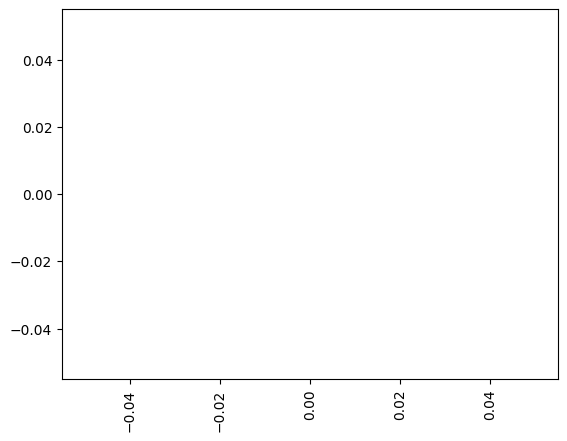

In [6]:
missing = train.isnull().sum()
missing = missing[missing > 0]/938583 # 3adad rows
plt.bar(missing.index, missing.values)
plt.xticks(rotation = 90)
plt.show()
# Have a look in the discription
# Your findings ?

In [7]:
train     #after removing dup and nulls

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp,label
0,0.041268,15499.00,64.00,7805.845961,7805.845961,0.0,0.0,0.00,0.00,50.00,...,0,0,0,0,0,0,0,1,0,DDoS
1,0.018393,3702.54,64.00,6728.994198,6728.994198,0.0,0.0,0.00,0.01,54.28,...,0,0,0,0,0,0,0,1,0,DDoS
2,0.000000,182.00,64.00,38.559448,38.559448,0.0,0.0,0.00,0.00,182.00,...,0,0,0,0,0,0,0,1,0,DoS
3,0.109292,35027.55,62.72,6783.234241,6783.234241,0.0,0.0,0.03,0.11,65.11,...,0,0,0,0,0,0,0,1,0,DoS
4,0.000000,162.00,64.00,2.305494,2.305494,0.0,0.0,0.00,0.00,162.00,...,0,0,0,0,0,0,0,1,0,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938577,0.892084,182058.50,64.00,134.759195,134.759195,0.0,0.0,0.00,0.00,1514.00,...,0,0,0,0,0,0,0,0,0,DDoS
938578,0.000000,55.41,63.91,42.798147,42.798147,0.0,0.0,1.00,1.00,80.79,...,0,0,1,1,0,0,1,0,0,DDoS
938580,0.292916,33157.18,64.00,80328.529520,80328.529520,0.0,0.0,0.00,0.00,50.24,...,0,0,0,0,0,0,0,1,0,DoS
938581,0.093229,29205.50,63.36,6208.472050,6208.472050,0.0,0.0,0.00,0.00,50.70,...,0,0,0,0,0,0,0,1,0,DDoS


In [8]:
# get the  quantitative features
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']


quantitative_data = train[quantitative]
quantitative_data.head()

,flow_time,header_size,packet_duration,overall_rate,src_rate,dst_rate,fin_packets,urg_packets,rst_packets,max_value,...,fin_flags,syn_flags,rst_flags,psh_flags,ack_flags,protocol_http,protocol_https,protocol_tcp,protocol_udp,protocol_icmp
0,0.041268,15499.00,64.00,7805.845961,7805.845961,0.0,0.0,0.00,0.00,50.00,...,0,0,0,0,0,0,0,0,1,0
1,0.018393,3702.54,64.00,6728.994198,6728.994198,0.0,0.0,0.00,0.01,54.28,...,0,0,0,0,0,0,0,0,1,0
2,0.000000,182.00,64.00,38.559448,38.559448,0.0,0.0,0.00,0.00,182.00,...,0,0,0,0,0,0,0,0,1,0
3,0.109292,35027.55,62.72,6783.234241,6783.234241,0.0,0.0,0.03,0.11,65.11,...,0,0,0,0,0,0,0,0,1,0
4,0.000000,162.00,64.00,2.305494,2.305494,0.0,0.0,0.00,0.00,162.00,...,0,0,0,0,0,0,0,0,1,0


In [9]:
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
qualitative_data = train[qualitative]
qualitative_data.head()

,label
0,DDoS
1,DDoS
2,DoS
3,DoS
4,DoS


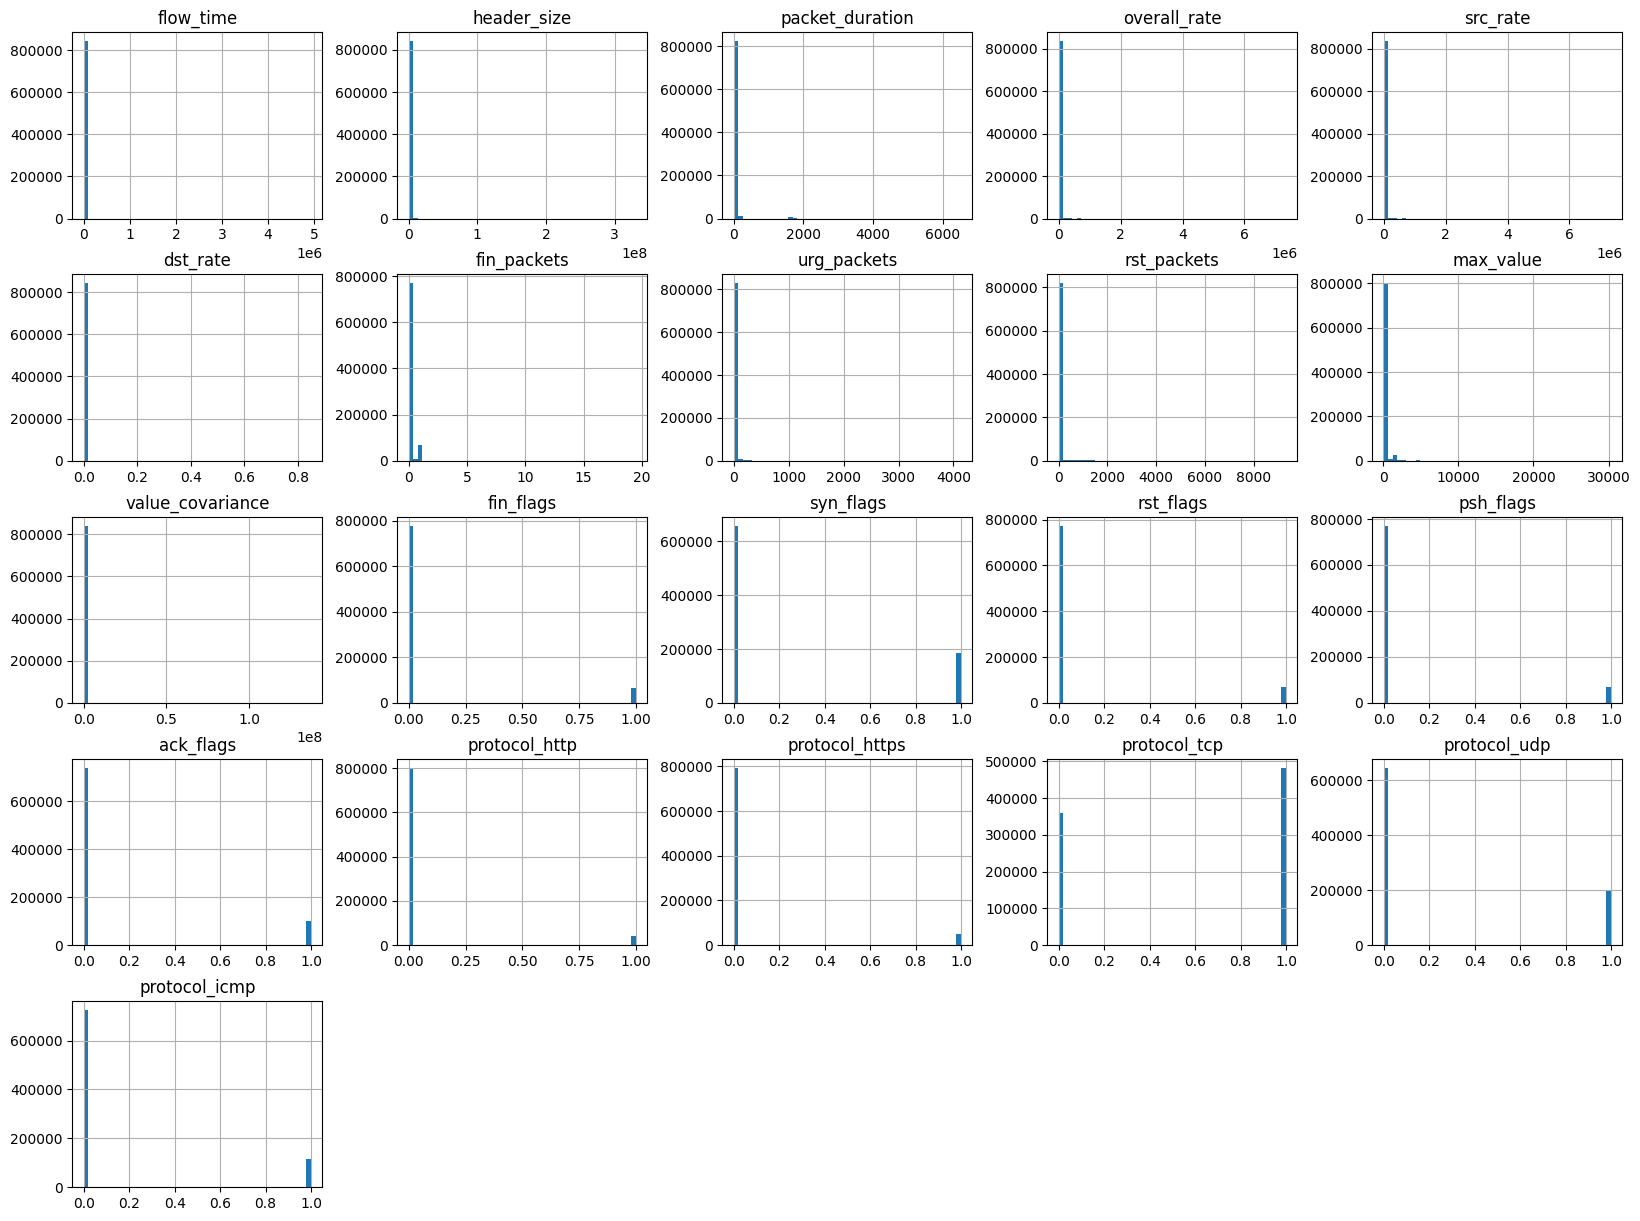

In [10]:
quantitative_data.hist(bins=50, figsize=(20,15))
plt.show()


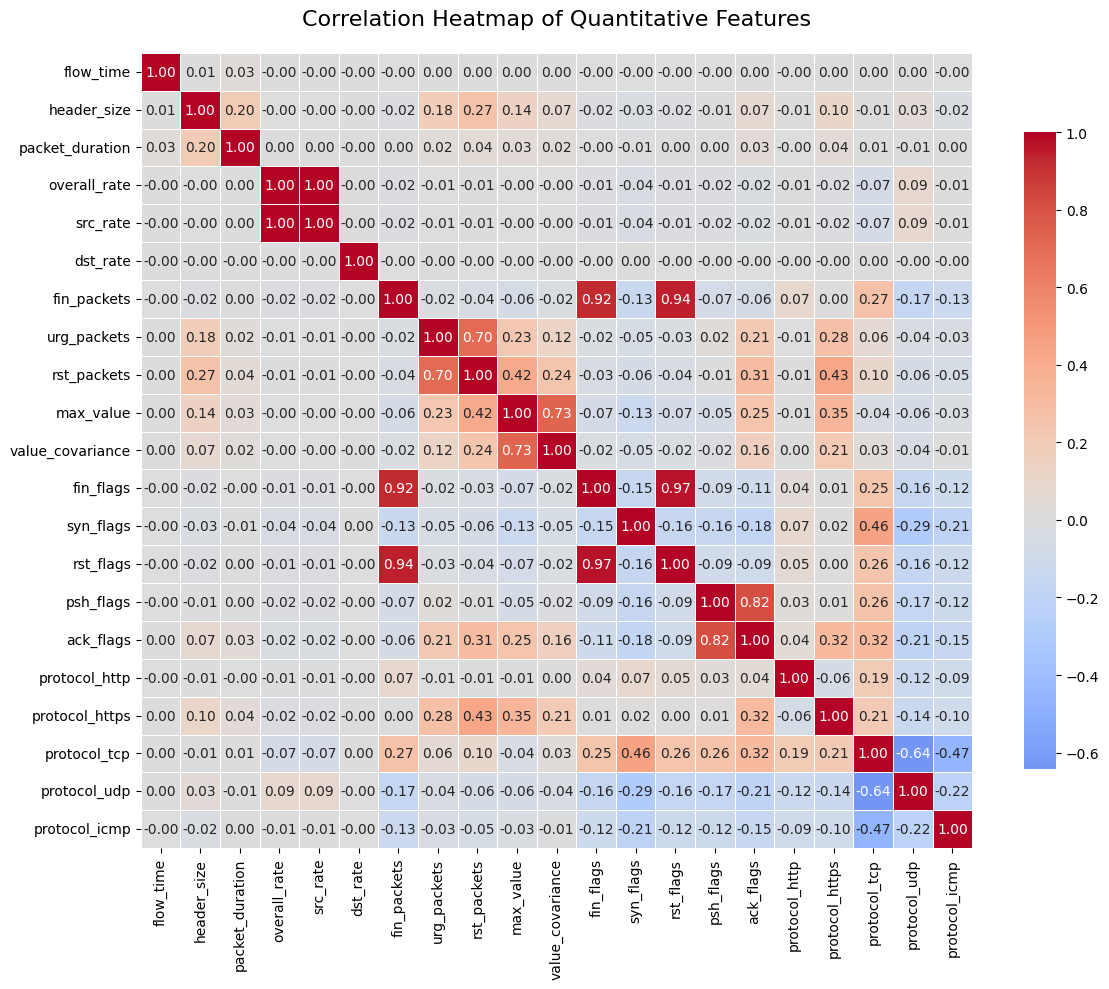

In [11]:
corr = quantitative_data.corr()



plt.figure(figsize=(12, 10))



sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})



plt.title('Correlation Heatmap of Quantitative Features', pad=20, fontsize=16)

plt.tight_layout()
plt.show()

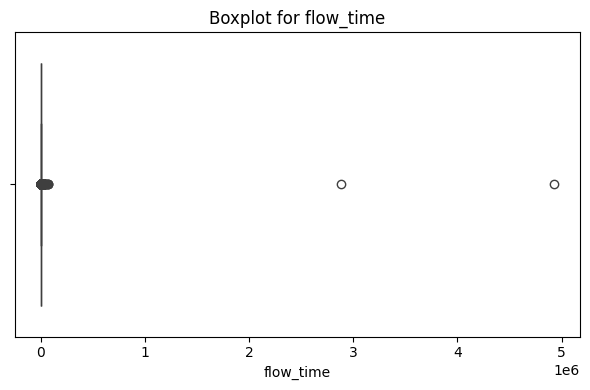

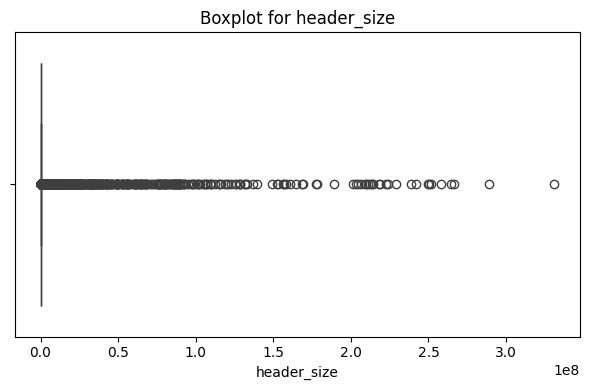

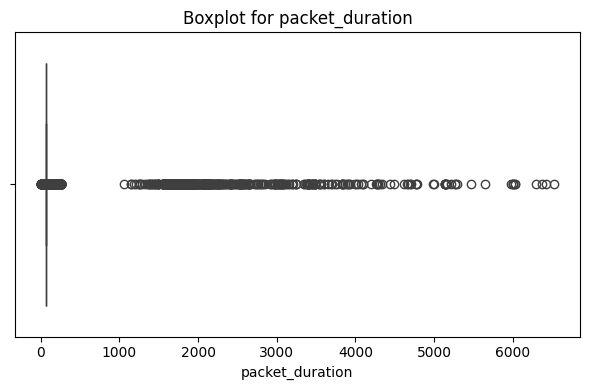

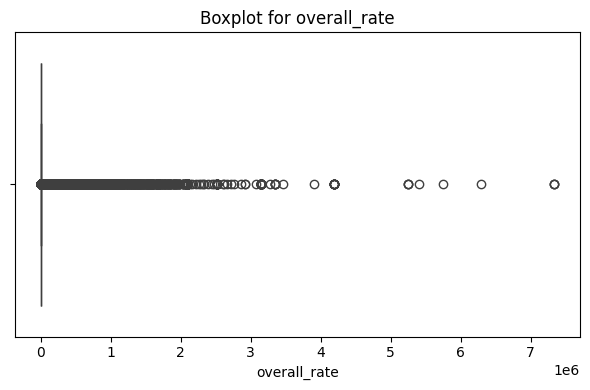

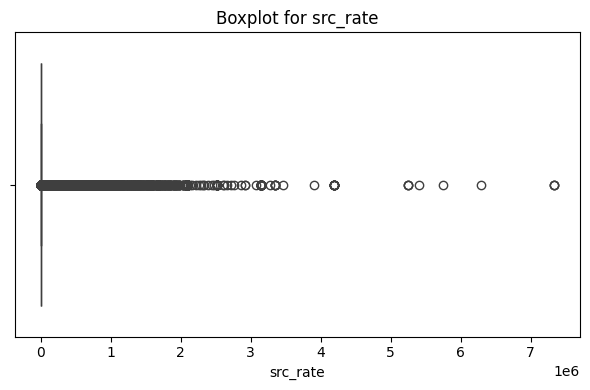

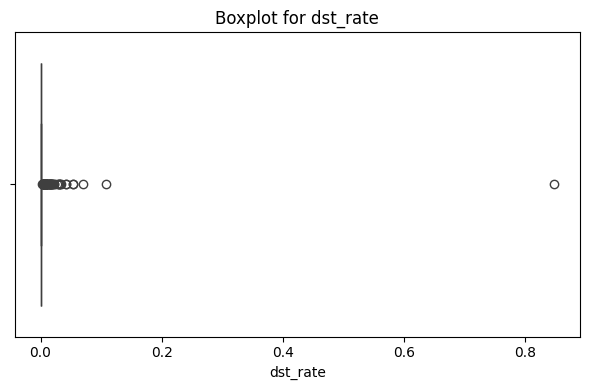

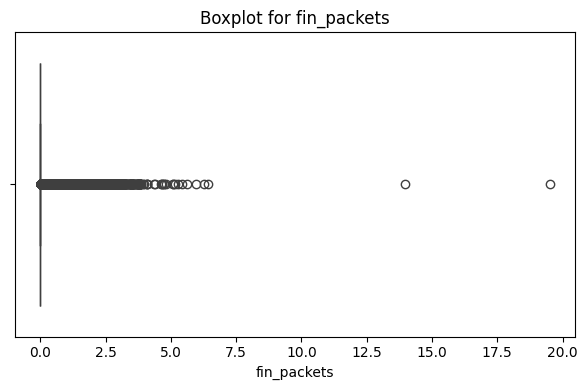

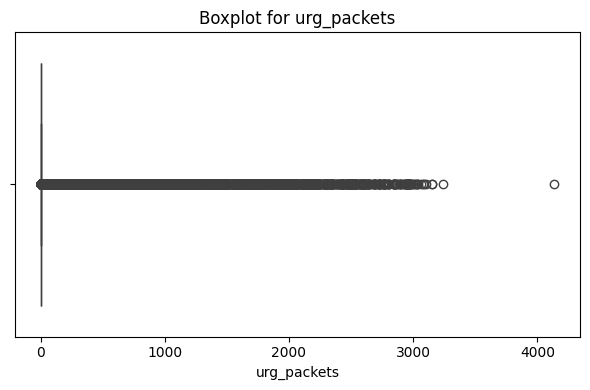

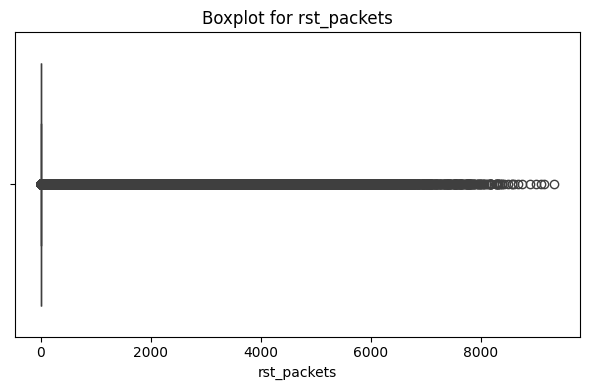

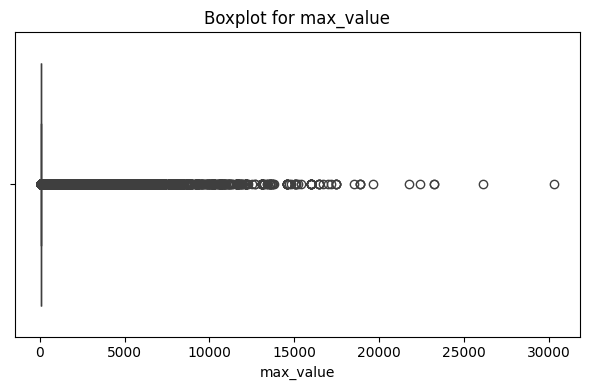

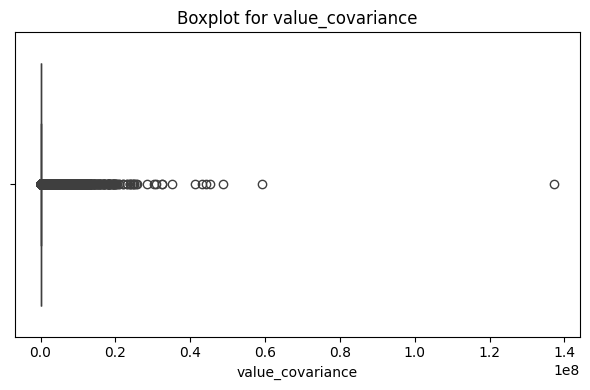

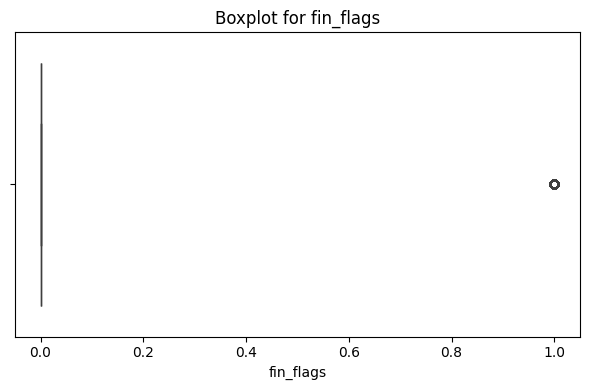

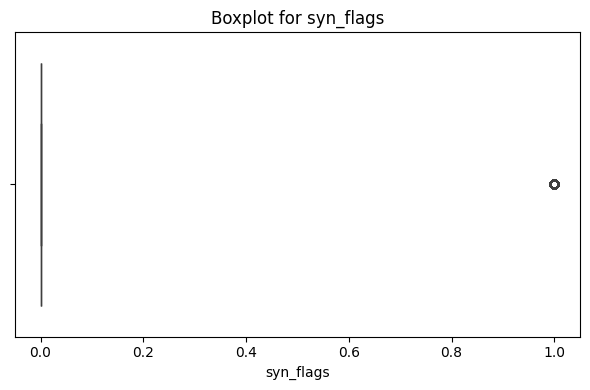

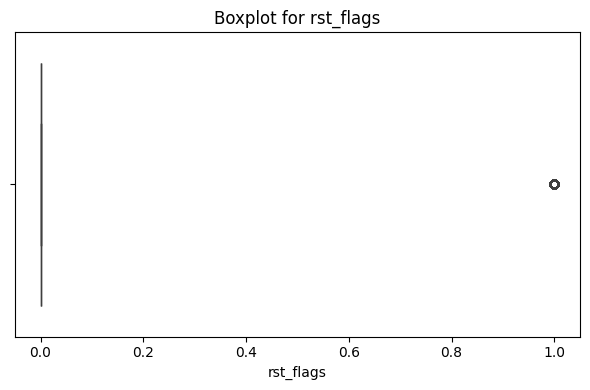

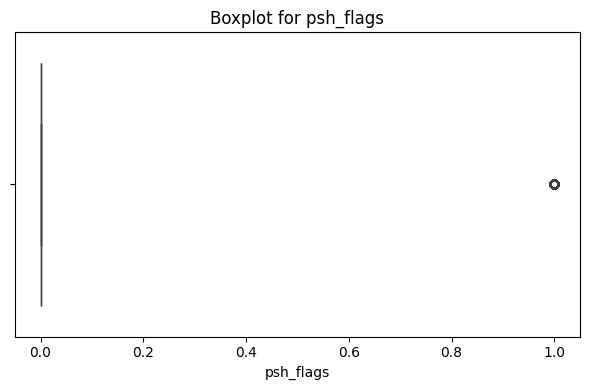

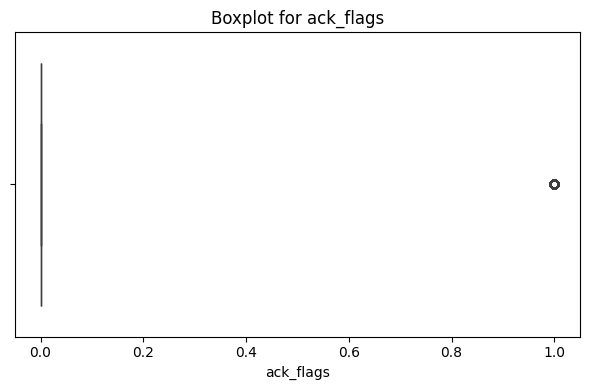

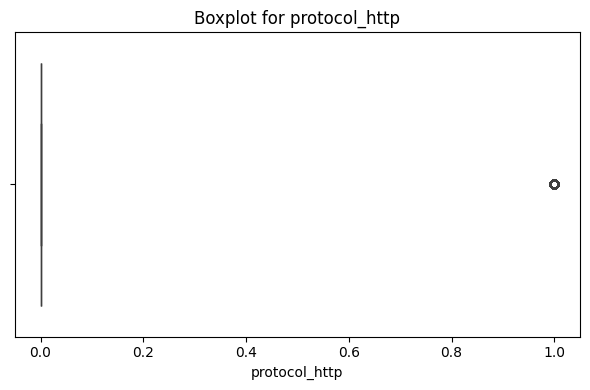

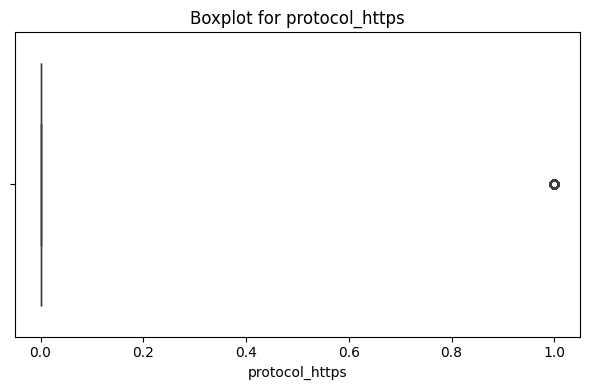

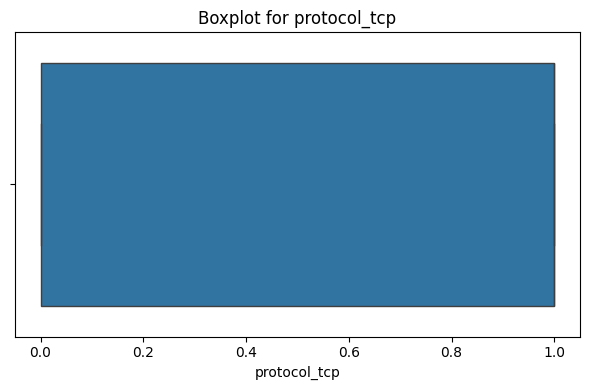

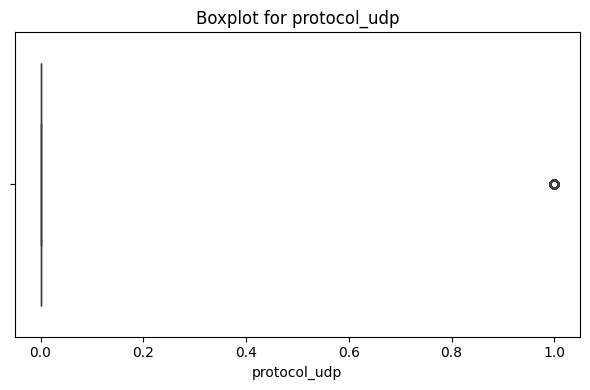

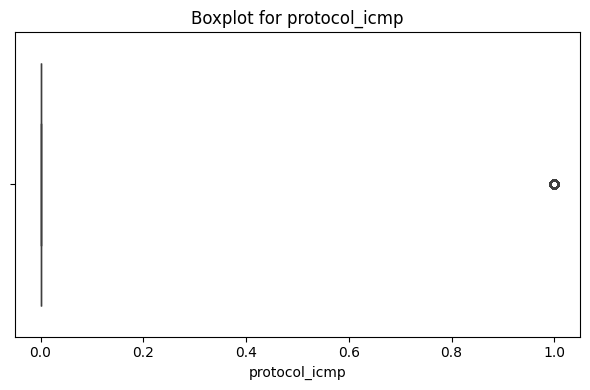

In [12]:
for col in quantitative:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train, x=col)
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
    plt.show()


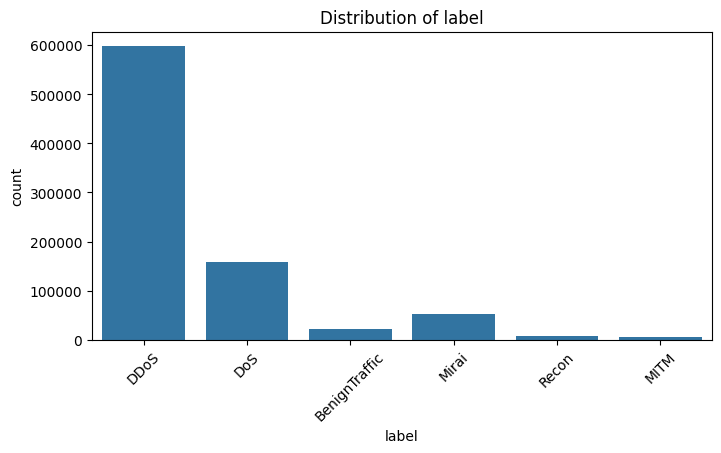

In [13]:
for col in qualitative:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=qualitative_data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [14]:
X = train.drop(columns=['label'])
y = train['label']

In [15]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [16]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
selector_kbest = SelectKBest(score_func=f_classif, k=20)
X_kbest = selector_kbest.fit_transform(X_scaled, y_encoded)
selected_kbest = X.columns[selector_kbest.get_support()]




X_selected = X[selected_kbest]
X_scaled_selected = scaler.fit_transform(X_selected)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_selected, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [19]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Classes after SMOTE:", Counter(y_train_res))


Class distribution after SMOTE: Counter({np.int64(1): 478317, np.int64(2): 478317, np.int64(4): 478317, np.int64(5): 478317, np.int64(3): 478317, np.int64(0): 478317})


In [21]:
# Model1: Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", acc_rf)
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


Random Forest Accuracy: 0.8583214624881291
               precision    recall  f1-score   support

BenignTraffic       0.84      0.93      0.88      4397
         DDoS       0.94      0.87      0.90    119580
          DoS       0.62      0.77      0.68     31699
         MITM       0.77      0.74      0.76      1263
        Mirai       0.99      0.99      0.99     10255
        Recon       0.72      0.71      0.71      1286

     accuracy                           0.86    168480
    macro avg       0.81      0.84      0.82    168480
 weighted avg       0.87      0.86      0.86    168480



In [23]:
#Model 2 : balanced random forest
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=200, random_state=42)
brf.fit(X_train, y_train)
y_pred_brf = brf.predict(X_test)
acc_brf = accuracy_score(y_test, y_pred_brf)
print("\nBalanced Random Forest Accuracy:", acc_brf)
print(classification_report(y_test, y_pred_brf, target_names=le.classes_))


Balanced Random Forest Accuracy: 0.8468364197530864
               precision    recall  f1-score   support

BenignTraffic       0.86      0.90      0.88      4397
         DDoS       0.95      0.84      0.89    119580
          DoS       0.58      0.83      0.69     31699
         MITM       0.70      0.77      0.73      1263
        Mirai       1.00      0.99      0.99     10255
        Recon       0.54      0.77      0.63      1286

     accuracy                           0.85    168480
    macro avg       0.77      0.85      0.80    168480
 weighted avg       0.88      0.85      0.86    168480



In [26]:
#model 3 : xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    eval_metric='mlogloss'
)
xgb.fit(X_train_res, y_train_res)
y_pred = xgb.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred)}")

XGBoost Accuracy: 0.8639


In [28]:
#Model 4: LightGBM
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_res, y_train_res)
y_pred_lgbm = lgbm.predict(X_test)
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("\nLightGBM Accuracy:", acc_lgbm)
print(classification_report(y_test, y_pred_lgbm, target_names=le.classes_))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.468305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4623
[LightGBM] [Info] Number of data points in the train set: 2869902, number of used features: 20
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LightGBM Accuracy: 0.8593839031339031
               precision    recall  f1-score   support

BenignTraffic       0.86      0.88      0.87      4397
         DDoS       0.94      0.87      0.90    119580
          DoS       0.62      0.79      0.69     31699
         MITM       0.69      0.74      0.71      1263
        Mirai       0.99      0.99      0.99     10255
        Recon       0.60      0.76      0.67      1286

     accuracy                           0.86    168480
    macro avg       0.78      0.84      0.81    168480
 weighted avg       0.88      0.86      0.87    168480



In [ ]:
#Model 5 - ensembling Stacking Classifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
]

stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    stack_method='predict_proba'
)

stacking.fit(X_train_res, y_train_res)
y_pred_stack = stacking.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack)
print("\nStacking Classifier Accuracy:", acc_stack)
print(classification_report(y_test, y_pred_stack, target_names=le.classes_))

In [29]:
test = pd.read_csv('test.csv')

submission_ids = test['Id']

X_test_final = test.drop(columns=['Id'], errors='ignore')
X_test_final = test[selected_kbest]




X_test_final_scaled = scaler.transform(X_test_final)



y_test_pred_final = rf.predict(X_test_final_scaled)



y_test_labels = le.inverse_transform(y_test_pred_final)





submission = pd.DataFrame({
    'Id': np.arange(len(test)),
    'label': y_test_labels
})




submission.to_csv('best_submission.csv', index=False)
print("Submission saved to 'submission.csv'")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Submission saved to 'submission.csv'
